In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D


%matplotlib notebook
import numpy as np

def cylinder(r,n,h):
    '''
    Returns the unit cylinder that corresponds to the curve r.
    INPUTS:  r - a vector of radii
             n - number of coordinates to return for each element in r

    OUTPUTS: x,y,z - coordinates of points
    '''

    # ensure that r is a column vector
    r = np.atleast_2d(r)
    r_rows,r_cols = r.shape
    
    if r_cols > r_rows:
        r = r.T

    # find points along x and y axes
    points  = np.linspace(0,2*np.pi,n+1)
    x = np.cos(points)*r
    y = np.sin(points)*r

    # find points along z axis
    rpoints = np.atleast_2d(np.linspace(0,h,len(r)))
    z = np.ones((1,n+1))*rpoints.T
    
    return x,y,z

<IPython.core.display.Javascript object>


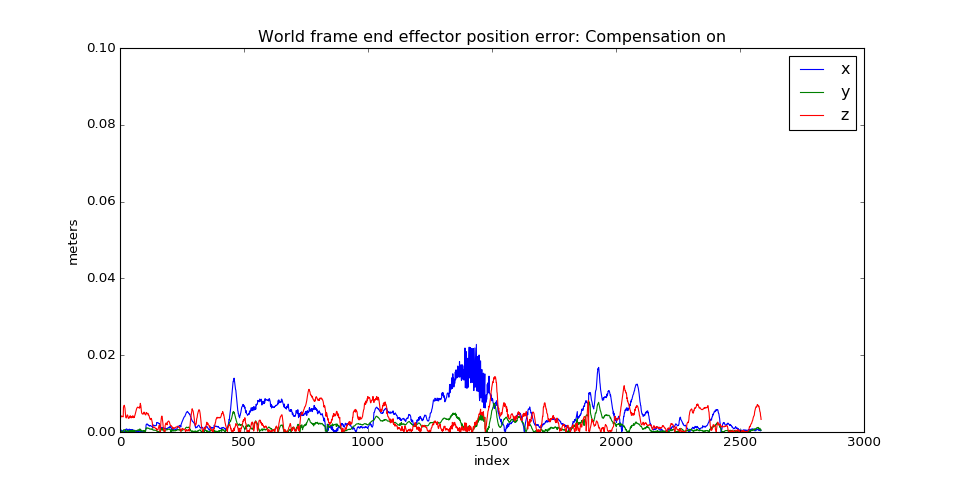

Average errors: 

[0.0040264021006316715, 0.0014317874188721487, 0.002932473589060283]


In [7]:
pkl_file = open('../anthony/data/physical/circle_supervised_1.pkl', 'rb')
vicon_1, state_1, _, _, error_1, average_error_1 = pickle.load(pkl_file)
pkl_file.close()

err_fig = plt.figure()
err_fig.add_subplot(111)
plt.plot(error_1[100:-100])
plt.ylabel('meters')
plt.title('World frame end effector position error: Compensation on')
plt.legend(['x', 'y', 'z'])
plt.legend(['x', 'y', 'z'])
plt.xlabel('index')

plt.ylim([0, 0.1])
err_fig.set_size_inches(12, 6, forward=True)

plt.show()

print("Average errors: \n")
print(average_error_1)

<IPython.core.display.Javascript object>


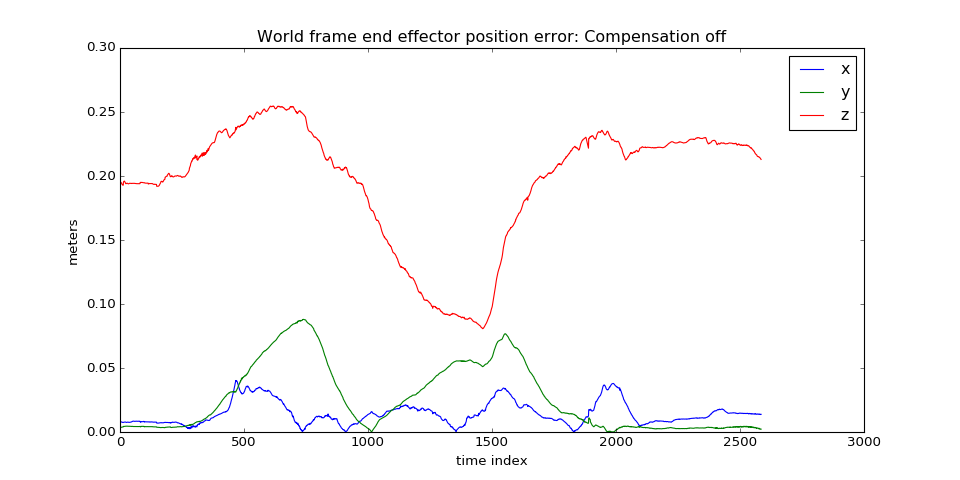

Average errors: 

[0.014928614994779328, 0.026443046034123837, 0.20241423477806447]


In [6]:
pkl_file = open('../anthony/data/physical/circle_supervised_off_0.pkl', 'rb')
vicon_2, state_2, _, _, error_2, average_error_2 = pickle.load(pkl_file)
pkl_file.close()

err_fig = plt.figure()
err_fig.add_subplot(111)
plt.plot(error_2[100:-100])
plt.ylabel('meters')
plt.title('World frame end effector position error: Compensation off')
plt.legend(['x', 'y', 'z'])
plt.legend(['x', 'y', 'z'])
plt.xlabel('time index')

err_fig.set_size_inches(12, 6, forward=True)

plt.show()

print("Average errors: \n")
print(average_error_2)

<IPython.core.display.Javascript object>


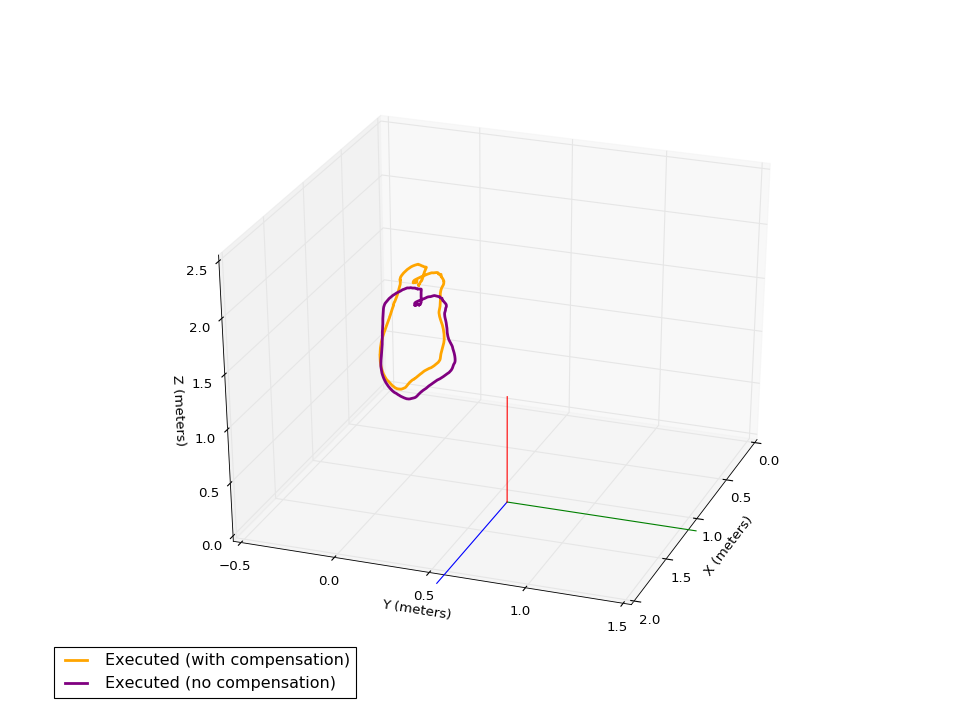

In [97]:
#plot for desired trajectory vs. executed trajectory without gravity compensation

end_effector_fig = plt.figure(0)

ax = end_effector_fig.add_subplot(111, projection='3d')

ax.plot(np.array(vicon_1)[100:-100,0], 
        np.array(vicon_1)[100:-100,1], 
        np.array(vicon_1)[100:-100,2], 
        color = 'orange',
        linewidth = 2.5)

plt.ylabel('meters')
# plt.title('World frame end effector position: Desired vs. Performed', y=1.08)

ax.plot(np.array(vicon_2)[100:-100,0], 
        np.array(vicon_2)[100:-100,1], 
        np.array(vicon_2)[100:-100,2], 
        color = 'purple',
        linewidth = 2.5)
plt.ylabel('meters')
plt.legend(['Executed (with compensation)', 'Executed (no compensation)'], loc=3, bbox_to_anchor=(-0.1, -.1))

r = np.ones((5000,1))*0.2
n = 50
h = 3

pos = [1.2, 0.6, 0]

[x,y,z] = cylinder(r,n,h)
# ax.plot_wireframe(x+pos[0],y+pos[1],z+pos[2], color='black')
# ax.plot_surface(x+pos[0],y+pos[1],z+pos[2], color='black', 
#                         alpha=1,
#                         linewidth=0.1,
#                         antialiased=True,
#                         vmin=0,
#                         rstride=10,
#                         cstride=10)

x_frame = np.hstack([np.linspace(0, 1, 100)[:, np.newaxis], np.zeros((100, 1)), np.zeros((100, 1))])
y_frame = np.hstack([np.zeros((100, 1)), np.linspace(0, 1, 100)[:, np.newaxis],np.zeros((100, 1))])
z_frame = np.hstack([np.zeros((100, 1)), np.zeros((100, 1)), np.linspace(0, 1, 100)[:, np.newaxis]])

ax.plot(x_frame[:, 0] + pos[0], x_frame[:, 1] + pos[1], x_frame[:, 2], color='blue')
ax.plot(y_frame[:, 0] + pos[0], y_frame[:, 1] + pos[1], y_frame[:, 2], color='green')
ax.plot(z_frame[:, 0] + pos[0], z_frame[:, 1] + pos[1], z_frame[:, 2], color='red')


ax.set_xlim(0, 2)
ax.set_ylim(-0.5, 1.5)
ax.set_zlim(0, 2.5)
ax.set_xlabel('X (meters)')
ax.set_ylabel('Y (meters)')
ax.set_zlabel('Z (meters)')
# plt.zlabel('z')

ax.view_init(30, 20)
# plt.draw()


end_effector_fig.set_size_inches(12, 9, forward=True)

plt.show()

<IPython.core.display.Javascript object>


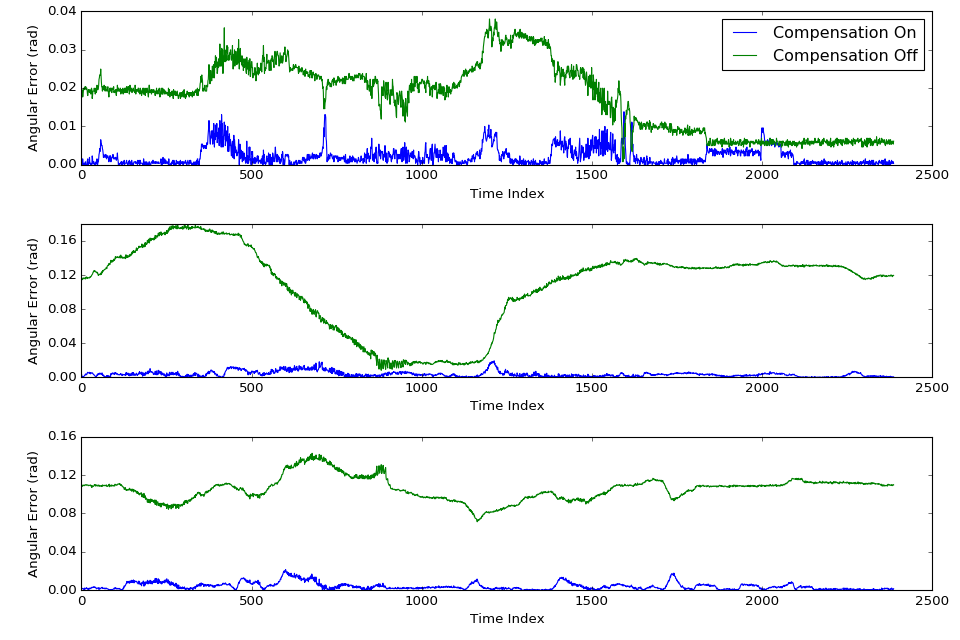

In [90]:
pkl_file = open('../anthony/data/physical/circles/compensations_on_loop1.pkl', 'rb')
vicon_on, state_on, _, _, error_on, average_error_on = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('../anthony/data/physical/circles/compensations_off_loop1.pkl', 'rb')
vicon_off, state_off, _, _, error_off, average_error_off = pickle.load(pkl_file)
pkl_file.close()

error_on, error_off = dict(), dict()

err_fig = plt.figure()

subplot_list = [2, 1, 3]
name_list = ['Wrist', 'Shoulder', 'Elbow']
plot_n = 0


for i, name in enumerate(state_on['theta_measured'].keys()):
    error_on[name] = (np.abs(np.array(state_on['theta_measured'][name]) - np.array(state_on['theta_desired'][name])))
    error_off[name] = (np.abs(np.array(state_off['theta_measured'][name]) - np.array(state_off['theta_desired'][name])))
    if name in ['right_s1', 'right_e1', 'right_w1']:
        err_fig.add_subplot(3, 1, subplot_list[plot_n])
        plt.plot(error_on[name][400:])
        plt.plot(error_off[name][400:])
        if subplot_list[plot_n] == 1:
            plt.legend(['Compensation On', 'Compensation Off'])
        plt.xlabel('Time Index')
        plt.ylabel('Angular Error (rad)')
#         plt.title('Joint Angle Error - %s' %name_list[plot_n])
        
        locs, labels = plt.yticks()
        plt.yticks(locs[::2])
        
        plot_n += 1

#         axis.get_major_ticks(numticks=None)
plt.tight_layout(pad=0.1, h_pad=None, w_pad=None, rect=None)    
err_fig.set_size_inches(12, 8, forward=True)    
plt.show()